## This notebook uses Algorithm 1 explained in Section 2 of the paper to find absorption features in the median spectrum calculated for 51 Pegasi.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from abfeature_functions import findabsorptionfeatures

In [2]:
template = pd.read_csv("medianspec.csv")

In [3]:
#Pick lower and upper bounds for what wavelength window to find absorption features in. Doing it for the whole spectrum can 
#sometimes take a few minutes.
practice = np.where((template.Wavelength.values > 5470) & (template.Wavelength.values < 5500))[0]

In [5]:
#Here's where you can change the tuning parameters
notnan = np.where(~np.isnan(template.Flux.values[practice]))[0]
wvbounds, minwvs, minflxs, maxflxs = findabsorptionfeatures(template.Wavelength.values[practice[notnan]], 
                                                            template.Flux.values[practice[notnan]],
                                                            pix_range=8, minlinedepth=0.015, eta=0.07, alpha=0.05)

In [6]:
#How many absorption features did the algorithm find?
len(wvbounds)

61

<IPython.core.display.Javascript object>


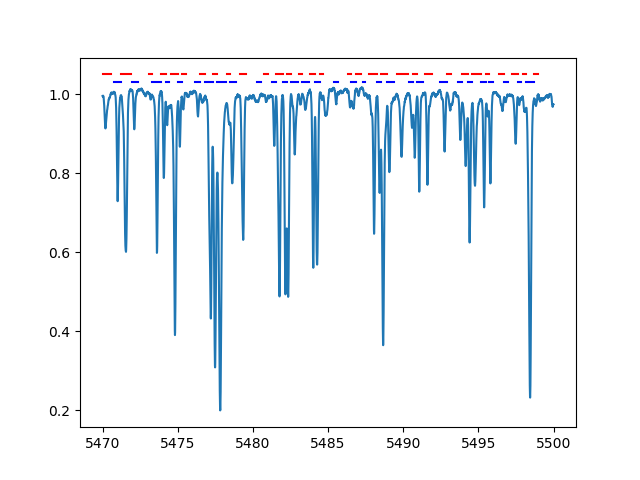

In [7]:
#Do the results match what we would expect by eye?
%matplotlib notebook
plt.plot(template.Wavelength[practice], template.Flux[practice])
for i in range(len(wvbounds)):
    if i%2 == 0:
        plt.plot(wvbounds[i], (1.05, 1.05), c='red')
    else:
        plt.plot(wvbounds[i], (1.03, 1.03), c='blue')
plt.show()